# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [1]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 15.5 MB/s 
     |████████████████████████████████| 166 kB 42.6 MB/s 
     |████████████████████████████████| 182 kB 68.4 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 166 kB 75.5 MB/s 
     |████████████████████████████████| 162 kB 73.5 MB/s 
     |████████████████████████████████| 162 kB 74.8 MB/s 
     |████████████████████████████████| 158 kB 73.7 MB/s 
     |████████████████████████████████| 157 kB 74.8 MB/s 
     |████████████████████████████████| 157 kB 63.1 MB/s 
     |████████████████████████████████| 157 kB 71.8 MB/s 
     |████████████████████████████████| 157 kB 74.6 MB/s 
     |████████████████████████████████| 157 kB 78.7 MB/s 
     |████████████████████████████████| 157 kB 73.9 MB/s 
     |████████████████████████████████| 157 kB 79.2 MB/s 
     |███████████████████████████

In [2]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

from torchmetrics.functional import accuracy

In [4]:
def seed_everything(seed):
  
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(141)

In [7]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2022-11-08 14:52:31--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2022-11-08 14:52:31--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd607dc7693bd6e98abb2782848.dl.dropboxusercontent.com/cd/0/get/BwXm0uTtjGMiSKay-8l6UFngysP7eLIwztu5cA6lSzgAGrHrLhEsZPus_irCsTQEIXxYmcDBbKByBGDUOq3s8_BcZgJUOzpVJAavgk522PdtMa5132uuQwpzMYmQ6ZuNuAqgxZferARnxr4cXfjbtcTpZzpPXn9Mapw3WpaeQUz4XQ/file?dl=1# [following]
--2022-11-08 14:52:32--  https://ucd607dc7693bd6e98abb2782848.dl.dropboxusercontent.com/cd/0/get/BwXm0uTtjGMiSKay-8l6UFngysP7eLIwztu5cA6lSzgAGrHrLhEsZPus_irCsTQEIXxYmcDBbKByBG

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True) 

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели. 
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать: 

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали. 
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [5]:
import PIL

In [6]:
# YOU CAN DEFINE AUGMENTATIONS HERE
seed_everything(141)
train_transform = transforms.Compose([
        transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

val_transform = transforms.Compose([
       transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle = True, num_workers=4)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle = False, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1298: UserWarning: The parameter 'resample' is deprecated since 0.12 and will be removed 0.14. Please use 'interpolation' instead.
  "The parameter 'resample' is deprecated since 0.12 and will be removed 0.14. "
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [7]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

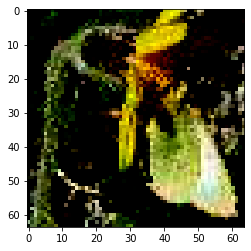

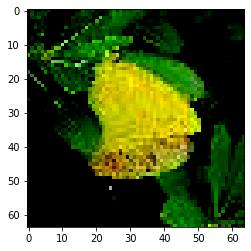

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

 Задание 1. 

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

Далее я определял в отедльных ячейках модели и подставлял их в YourNet (переменная self.layer).
Зафиксировал 3 лучших:

In [7]:
#Стоит заметить, что начинал с шага 0,005 и 10 эпох (на самой последней модели изменю)
#Изначально делал подобие нетолстой свёрточной сети, после Batchnorm лучше всех подошла функция Relu (пробовал LeakyRelu, Gelu и Softmax)
#На model_1 наилучшее качество было 0,2645
#Отчёт: https://wandb.ai/yaponsky_boh/lightning_logs/reports/Model_1--VmlldzoyOTM2MTU4?accessToken=4ypfw5qb1gqeesmh0zg1gym7r5szsmrn9g6mwvvkj81njc52gh4o3cm7r8uvrrk6
seed_everything(141)
model_1 = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1), 
    nn.BatchNorm2d(32), 
    nn.ReLU(),
    nn.Conv2d(32, 32, kernel_size=3, padding=1), 
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 
    nn.Dropout(0.3),

    nn.Conv2d(32, 64, kernel_size=3, padding=1), 
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64, 64, kernel_size=3, padding=1), 
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 
    nn.Dropout(0.3),

    nn.Conv2d(64, 128, kernel_size=3, padding=1), 
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.Conv2d(128, 128, 3, padding=1), 
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 
    nn.Dropout(0.3),

    nn.Flatten(), 
    nn.Linear(128 * 8 * 8, 256), 
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256,200)
)

In [8]:
#Оставил Relu только в конце каждого слоя и убрал дропауты - качество полнялось до 0,2943
#Отчёт: https://wandb.ai/yaponsky_boh/lightning_logs/reports/Model_2--VmlldzoyOTM2MTcy?accessToken=dl6zd1eb8tsw82d37i86qaryin7ecd9gj3b4fyw4p87f37ns0b1jws9cd30pq29b
seed_everything(141)
model_2 = nn.Sequential(
        nn.Conv2d(3, 32, 3, padding=1),
        nn.BatchNorm2d(32),
        nn.Conv2d(32, 32, 3, padding=1),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(3, stride=2),
        nn.ReLU(),

        nn.Conv2d(32, 64, 3, padding=1),
        nn.BatchNorm2d(64),
        nn.Conv2d(64, 64, 3, padding=1),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(3, stride=2),
        nn.ReLU(),

        nn.Conv2d(64, 128, 3, padding=1),
        nn.BatchNorm2d(128),
        nn.Conv2d(128, 128, 3, padding=1),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(3, stride=2),
        nn.ReLU(),

        nn.Flatten(),
        nn.Linear(128*49, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Linear(256,200)


)

In [9]:
#Поднял число выходных каналов в первом слое до 64, а в последнем соответственно - до 256, а также добавил auto_lr_find - получил качество 0,393
#Изменил шаг на 0,001 и RElu на LeakyRelu - 0.4168
#Оптимизатор RAdam (другие ещё меньше) поднял качество лишь до 0,4173, поэтому решил оставить Adam
#Поднял число эпох до 15 - получил 0,4242 - финальное качество
#Отчёт по финальной версии модели: https://wandb.ai/yaponsky_boh/lightning_logs/reports/Model_3--VmlldzoyOTM2MTgw?accessToken=2cct898u3sg2jihvwqg4f8jzk3yzc53ujz8ox7e11sub9c8o1x0dwuacxaetisac
seed_everything(141)
model_3 = nn.Sequential(
        nn.Conv2d(3, 64, 3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(),
        nn.Conv2d(64, 64, 3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(),
        nn.MaxPool2d(3, stride=2),
        nn.LeakyReLU(),

        nn.Conv2d(64, 128, 3, padding=1),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(),
        nn.Conv2d(128, 128, 3, padding=1),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(),
        nn.MaxPool2d(3, stride=2),
        nn.LeakyReLU(),

        nn.Conv2d(128, 256, 3, padding=1),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(),
        nn.Conv2d(256, 256, 3, padding=1),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(),
        nn.MaxPool2d(3, stride=2),
        nn.LeakyReLU(),

        nn.Flatten(),
        nn.Linear(256*49, 256),
        nn.BatchNorm1d(256),
        nn.LeakyReLU(),
        nn.Linear(256,200)


)

In [10]:
seed_everything(141)
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = model_3 #Сюда подставляю модели
        # --------------
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()
        

    def _forward(self, x):
        x = self.layer(x)
        return x
        

    def forward(self, images, target=None):
        output = self._forward(images)
        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets.cuda(), target.cuda()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds.cuda(), pred.cuda()), 0)
            self.accuracy = accuracy(self.preds.long(), self.targets.long())
        return loss

    def get_accuracy(self, reset=False):
        if reset:
          self.targets = torch.Tensor()
          self.preds = torch.Tensor()
        return self.accuracy
        

### Тренировочный класс lightning

In [11]:
seed_everything(141)
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log("train_loss", loss, prog_bar=True)  
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)

In [12]:
LR = 0.001

In [13]:
seed_everything(141)
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = YourNet().to(device) 
module = YourModule(model, learning_rate=LR) 

In [14]:
seed_everything(141)
trainer = pl.Trainer(accelerator = 'gpu', max_epochs=15, auto_lr_find=True, logger=wandb_logger) 
trainer.fit(module, train_dataloader, val_dataloader) 

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 4.4 M 
----------------------------------
4.4 M     Trainable params
0         Non-trainable params
4.4 M     Total params
17.643    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


### Валидация результатов задания

In [16]:
from sklearn.metrics import accuracy_score
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    predicted_classes = torch.Tensor([]).to(device)
    true_classes = torch.Tensor([]).to(device)

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)

            pred = model._forward(images)
            pred_classes = torch.argmax(pred, dim=-1)

            predicted_classes = torch.cat((predicted_classes, pred_classes), 0)
            true_classes = torch.cat((true_classes, labels), 0)

    return accuracy_score(predicted_classes.cpu().detach().numpy(), true_classes.cpu().detach().numpy())

In [17]:
seed_everything(141)
accurac = evaluate_task(model, val_dataloader)
print(f'Accuracy: {accurac}')
print(f"Оценка за это задание составит {np.clip(10 * accurac / 0.44, 0, 10):.2f} баллов")

  0%|          | 0/313 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 313/313 [00:05<00:00, 53.59it/s]

Accuracy: 0.1888
Оценка за это задание составит 4.29 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [8]:
#Аугментации оставил прежние, только добавил ресайз 200x200
seed_everything(141)
train_transform = transforms.Compose([
        transforms.Resize((200,200)),
        transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

val_transform = transforms.Compose([
       transforms.Resize((200,200)),
       transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle = True, num_workers=4)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle = False, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [9]:
from torchvision.models import convnext_base
model = convnext_base(weights = 'DEFAULT')

Downloading: "https://download.pytorch.org/models/convnext_large-ea097f82.pth" to /root/.cache/torch/hub/checkpoints/convnext_large-ea097f82.pth


  0%|          | 0.00/755M [00:00<?, ?B/s]

### Тренировочный класс lightning

In [12]:
seed_everything(141)
class skynet(pl.LightningModule):
    def __init__(self, model, pretrained):
        super().__init__()
        self.pretrained=pretrained
        if pretrained:
            self.model = convnext_base(pretrained=True)
            self.model.fc = nn.Identity()
            self.classifier = nn.Linear(1000, 200)
            self.optimizer = torch.optim.Adam(self.classifier.parameters(), lr = 0.001)
        else:
            self.model = convnext_base(pretrained=False)
            self.optimizer = torch.optim.Adam(self.model.parameters())

        self.loss = nn.CrossEntropyLoss()
    def forward(self, x):
        if self.pretrained:
            with torch.no_grad():
                features = self.model(x)
            preds = self.classifier(features)
        else:
            preds = self.model(x)
        return preds

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long())
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

In [13]:
seed_everything(141)
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device =  torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

shelby = skynet(model,pretrained=True)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/loggers/wandb.py:388: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  "There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse"
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ConvNeXt_Large_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNe

In [14]:
seed_everything(141)
trainer = pl.Trainer(accelerator = 'gpu', max_epochs=5, logger=wandb_logger)  # YOUR CODE HERE
trainer.fit(shelby, train_dataloader, val_dataloader)  # YOUR CODE HERE

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type             | Params
------------------------------------------------
0 | model      | ConvNeXt         | 197 M 
1 | classifier | Linear           | 200 K 
2 | loss       | CrossEntropyLoss | 0     
------------------------------------------------
197 M     Trainable params
0         Non-trainable params
197 M     Total params
791.870   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


2 эпохи - 0,827
3 - 0,821
4 - 
5 - 

### Валидация результатов задания

In [15]:
from sklearn.metrics import accuracy_score
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    predicted_classes = torch.Tensor([]).to(device)
    true_classes = torch.Tensor([]).to(device)

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)

            pred = model.forward(images)
            pred_classes = torch.argmax(pred, dim=-1)

            predicted_classes = torch.cat((predicted_classes, pred_classes), 0)
            true_classes = torch.cat((true_classes, labels), 0)

    return accuracy_score(predicted_classes.cpu().detach().numpy(), true_classes.cpu().detach().numpy())

In [16]:
seed_everything(141)
accur = evaluate_task(shelby, val_dataloader)
print(f'Accuracy: {accur}')
print(f"Оценка за это задание составит {np.clip(10 * (accur - 0.5) / 0.34, 0, 10):.2f} баллов")


  0%|          | 0/313 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))

 30%|███       | 95/313 [01:32<03:32,  1.03it/s]


KeyboardInterrupt: ignored

In [ ]:
#Сначала пробовал разные предобученные модели из класса efficientnet, но максимальное полученное качество было 0,58
#Затем экспериментировал с классом convnext, наилучшее качество вышло у convnext_base - 0,8287.
#Из гиперпараметров подбирал шаг - лучший вышел 0,001 (были еще 0,0001; 0,005; 0,0005), а также количество эпох - 1, 2 и 5 (остановился на 5)
#Ссылка на отчет wandb по наилучшей модели: https://wandb.ai/yaponsky_boh/lightning_logs/reports/Convnext_base--VmlldzoyOTM1OTM2?accessToken=qo1jw87v91map78xeij6h10uyc1hju4wkdsmwnx0fn2u8nxon43q33s49rfrugwb

In [ ]:
#Отчёт по всем прогонам в wandb: https://wandb.ai/yaponsky_boh/lightning_logs/reports/Total-abyss--VmlldzoyOTM2MTkz?accessToken=krcwizpbisz41n24q4b002chscmo0bxay23bth5xa5ahjn8fisn31fxy447cbhlf